Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

/home/bumho/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
df = nsfg.ReadFemPreg()

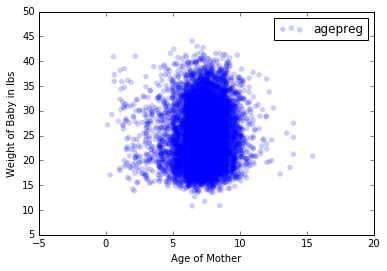

In [3]:
thinkplot.Scatter(df.totalwgt_lb, df.agepreg)
thinkplot.Show(xlabel='Age of Mother',
               ylabel='Weight of Baby in lbs')

Just by looking at the scattorplot there it does not seem like there is any correlation between two categories.

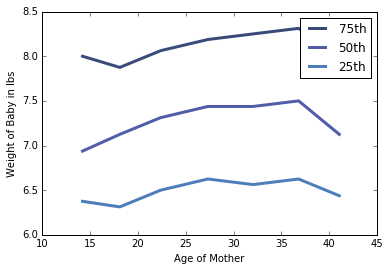

In [4]:
df_clean = df.dropna(subset=['totalwgt_lb', 'agepreg'])
bins = np.arange(5, 50, 5)
indices = np.digitize(df_clean.agepreg, bins)
groups = df_clean.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
thinkplot.Show(xlabel='Age of Mother',
               ylabel='Weight of Baby in lbs')

In [5]:
print 'Pearson', thinkstats2.Corr(df_clean.agepreg, df_clean.totalwgt_lb)
print 'Spearman', thinkstats2.SpearmanCorr(df_clean.agepreg, df_clean.totalwgt_lb)

Pearson 0.0688339703541
Spearman 0.0946100410966


The factors are very low which means that mother's age and total weight of the baby are not that well correlated.